# Machine Learning 4: Non-linear models and ensemble learning

## SVM - The new York Problem GridSearch CV

In [7]:
# Recover NTY data
import pickle
from scipy import sparse
import numpy as np

# Load the data
with open('NYT_data.pkl', 'rb') as fname:
    data = pickle.load(fname)
X_train = data[0]
y_train = data[1]
X_test = data[2]
y_test = data[3]
print('Loading ok.')

# Ensure target arrays are properly formatted
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

# Train the model
from sklearn import svm
clf = svm.LinearSVC(C = 0.02)
clf.fit(X_train, y_train)

Loading ok.


/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=0.02)

classification accuracy: 0.5469798657718121
Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.52      0.57       136
           2       0.26      0.64      0.37       114
           3       0.68      0.67      0.68       444
           4       0.13      0.33      0.19        12
           5       0.42      0.63      0.51       123
           6       0.71      0.72      0.72       195
           7       0.38      0.64      0.47        33
           8       0.56      0.66      0.60        61
          10       0.35      0.57      0.44        77
          12       0.48      0.41      0.44       516
          13       0.42      0.69      0.52        26
          14       0.18      0.79      0.29        33
          15       0.26      0.45      0.33       189
          16       0.63      0.60      0.62      1409
          17       0.38      0.65      0.48        83
          18       0.28      0.39      0.33        18
          19  

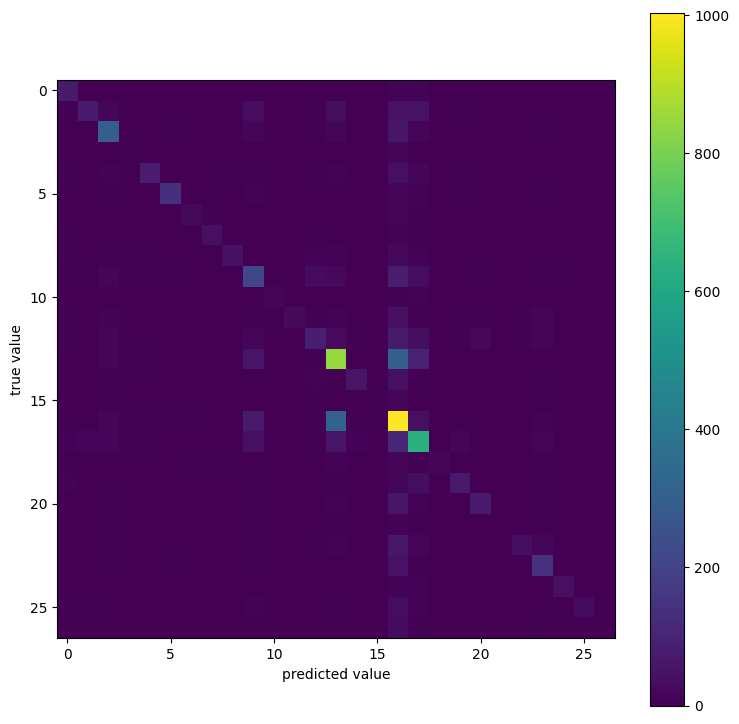

In [8]:
y_hat = clf.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))

Using the default parameters we can improve the recognition rate by $10\%$. However we can not check the most important words. Can we find a better trade-off?

In [9]:
# (Slides first - hyper parameter tunning)
# Importing necessary libraries for model selection
from sklearn import model_selection
from sklearn import svm

# Defining the parameter grid: 
# 'C' is a regularization parameter for LinearSVC. It controls the trade off between achieving a low training error and a 
# low testing error (generalization).
# A smaller 'C' value leads to a smoother decision boundary (less fitting to the training data), 
# while a larger 'C' encourages the model to classify all training examples correctly by giving the model more flexibility.
# Here, we're defining a range of 'C' values to try out with GridSearchCV to find the best one.
parameters = {'C': [0.01, 0.05, 0.1, 0.5, 1, 10]}

# Initializing the LinearSVC model
svc = svm.LinearSVC()

# Setting up GridSearchCV:
# 'svc' is the SVM model with a linear kernel to be trained.
# 'parameters' contains the grid of parameters ('C' values here) we want to try out.
# GridSearchCV will systematically work through the combinations of parameters (different 'C' values),
# train the model for each combination, and evaluate its performance.
clf = model_selection.GridSearchCV(svc, parameters)

# Fitting GridSearchCV:
# This will train the LinearSVC model multiple times with the different 'C' values specified in 'parameters'.
# For each 'C' value, it uses cross-validation to evaluate the model's performance.
# Cross-validation is a technique for assessing how the results of a statistical analysis will generalize to
# an independent data set.
# It does this by partitioning the original training data set into a training set to train the model,
# and a validation set to evaluate it. This process is repeated for each 'C' value.
clf.fit(X_train, y_train.ravel())

# After .fit() completes, clf (our GridSearchCV object) will contain a lot of information:
# - The best 'C' value found.
# - The model fitted with the best 'C' value.
# - The scores or performance metrics for each 'C' value tried.

/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 10]})

The best parameterization is {'C': 0.1}
The achieved score is 0.6021027654651043
Checking the rest of the scores 

[0.54049316 0.5961241  0.60210277 0.58391256 0.56919918 0.50894622]


/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_4032/2209456499.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0.01, 0.05, 0.1, 0.5, 1, 10])


[Text(-1.0, 0, '0.01'),
 Text(0.0, 0, '0.05'),
 Text(1.0, 0, '0.1'),
 Text(2.0, 0, '0.5'),
 Text(3.0, 0, '1'),
 Text(4.0, 0, '10'),
 Text(5.0, 0, ''),
 Text(6.0, 0, '')]

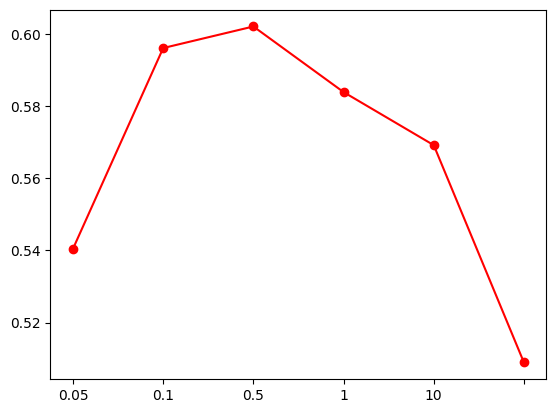

In [10]:
print ('The best parameterization is ' + str(clf.best_params_))
print ('The achieved score is ' + str(clf.best_score_))

print ('Checking the rest of the scores \n')
import matplotlib.pyplot as plt
print(clf.cv_results_['mean_test_score'])

plt.plot(clf.cv_results_['mean_test_score'],'r',marker='o')
ax = plt.gca()
ax.set_xticklabels([0.01, 0.05, 0.1, 0.5, 1, 10])    

## Extending Support Vector Machines to the Non-Linear Case 

### Stand Alone Reading: Kernels and non linearity

We have seen that a linear model in the parameters can model non-linear boundaries provided we **explicitly** map original data non-linearly. For example, we can create a linear model with features squared. This will lead to a quadratic boundary with respect to the original space. There is another way of **implicitly** encoding non-linearities by means of **kernels**.

The kernel encodes the notion of similarity between two data points. 

The change in the formulation involve the introduction of several concepts from mathematical analysis. For the sake of simplicity, we will skip the details (read "The story of a kernel" in the following paragraph or ask any detail if you are curious).

As a result, any regularized cost function optimization problem such as SVM has a solution of following form,

$$f(x) = \sum\limits_{i=1}^N \alpha_i k(x_i,x)$$


**The story of a kernel**
<p>
*Disclaimer: This is  a highly mathematically non rigorous story of how kernels come into play in machine learning.*
<p>
At some point we talked about keeping complexity in check. For that purpose we need to measure complexity. And we saw that certain models, such as linear models can control it using the norm of weights. To the fact of adding this penalty to the objective function we are optimizing is called *regularization*.
<p>
However, it would be great to be able to measure the complexity of any function. To address this issue we have to resort to functional analysis. Functional analysis is a brach of mathematical analyisis that deals with spaces of functions. For that purpose a Hilbert space must be introduced so that similarity and distance among functions can be measured. A Hilbert space is a complete vector space with inner product. Intuitively, it generalizes the classical Euclidean space to infinite dimensions, and thus, to functional spaces.
<p>
One particular functional space is the Reproducing Kernel Hilbert Space (RKHS). In this space a function evaluated on a point $x$ is defined by the inner product of the function and the kernel evaluated on that point, i.e. $f(x) = \langle f(\cdot),K(x,\cdot) \rangle$, where $K$ is the kernel. This is called Riesz representation and it is the key for showing the most important result for our problems, *The Representer's theorem*.
<p>
The Respresenter's theorem states that the solution of any problem with the following form 
$$
	f^*=\underset{f\in \mathcal{H}}{\operatorname{arg\,min}}\frac{1}{n}\sum_i{\mathcal{L}(f(x_i),y_i)}+\lambda\|f\|_{\mathcal{H}}^2
	$$
is given by
$$f(x) = \sum\limits_{i=1}^N \alpha_i k(x_i,x)$$
where $x_i$ are our samples. 
</div>
    

The kernel has to be a positive semi-definite function, such as:

+ Linear kernel: $$k(x_i,x_j) = x_i^Tx_j$$
+ Polynomial kernel: $$k(x_i,x_j) = (1+ x_i^Tx_j)^p$$
+ Radial Basis Function kernel $$k(x_i,x_j) = e^{-\frac{\|x_i-x_j\|^2}{2\sigma^2}}$$


<div class = "alert alert-error"> On a practical side you can define a kernel by using your favorite distance $d(x_i,x_j)$ and defining the kernel as
$$k(x_i,x_j) = e^{-\gamma d(x_i,x_j)}, \quad \gamma>0$$
where $\gamma$ is a hyper-parameter that controls the decay of the exponential (we will tune it using cross-validation). Observe that RBF is an instantiation of this more general rule.
</div>

As comented before, kernels implicitly encode a non-linear transformation and remember that SVM finds the optimal hyperplane. By combining both concepts we have a linear method applied on a data on a transformed space, but we do not have to provide the explicit transformation.

This becomes incredibly useful when one realizes that the feature mapping from a radial basis function kernel is a maping into a $\infty$-dimensional space.

Le us build our intuition about how kernels work with the following video:

### Kernels and Non linearity

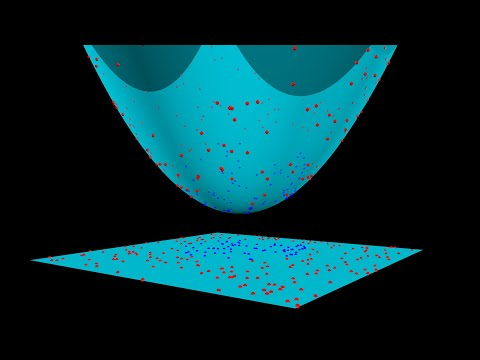

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA', size=700)

# Teacher: please explain the students what a kernel is, based on this video
# https://www.youtube.com/watch?v=3liCbRZPrZA&ab_channel=udiprod


Let us try it in a toy problem.

In [12]:
#Let's see what the boundary looks like in a toy problem.
%matplotlib inline
%reset -f
import numpy as np
import matplotlib.pyplot as plt
MAXN=10
np.random.seed(2)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1

from sklearn import svm
from sklearn import metrics

interactive(children=(FloatSlider(value=2.5010000000000003, description='gamma', max=5.0, min=0.011, step=0.01…

<function __main__.SVC_gamma(gamma, C)>

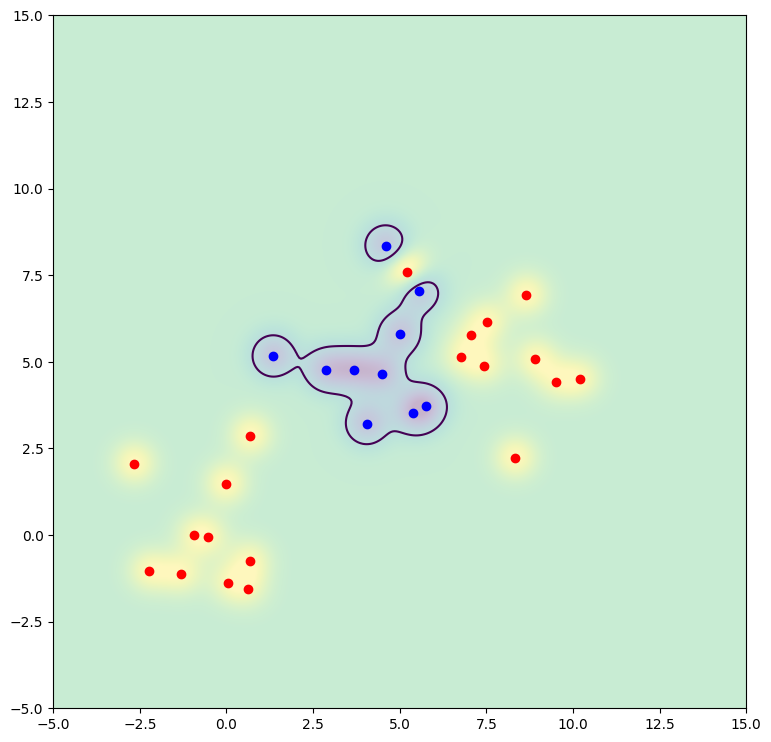

In [13]:
delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];

def SVC_gamma(gamma, C):
    clf = svm.SVC(kernel = 'rbf', gamma = gamma, C = C)
    clf.fit(X,y.ravel())


    ## The below code is needed to plot
    Z=clf.decision_function(data)
    Z.shape=sz
    plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
    plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')
    plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
    plt.contour(XX,YY,Z,[0])
    fig = plt.gcf()
    fig.set_size_inches(9,9)

#from IPython.html.widgets import interact
from ipywidgets import interact 
interact(SVC_gamma, gamma=(0.011,5.,0.01), C = (0.01,2))

### Application to customer churn prediction

Let us apply the RBF kernel SVM to the customer churn prediction. Usually, discriminant classifiers are not affine invariant and we have to consider some feature normalization process. For the sake of fairness, we will use the same standarization method.

In [14]:
import pandas as pd

## Load the data
churn_df = pd.read_csv('churn.csv')
col_names = churn_df.columns.tolist()

# Isolate target data
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)

# We don't need these columns
to_drop = ['State','Phone','Churn?']
churn_feat_space = churn_df.drop(to_drop,axis=1) #X

# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0. later
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

# Pull out features for future use
features = churn_feat_space.columns

X = churn_feat_space.values.astype(float)

print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 18 features
Unique target labels: [0 1]


In [15]:
#NO SNOOPING (the act of letting the model "know" things it shouldnt / see future data)
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics


kf=model_selection.KFold(n_splits=5,  shuffle=False)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    #Standard parameters
    clf = svm.SVC(kernel='rbf', gamma = 0.051, C = 1)
    clf.fit(X_train,y_train.ravel())
    X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.9186888537713125


/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_4032/1347475485.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_4032/1347475485.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels, size=20)


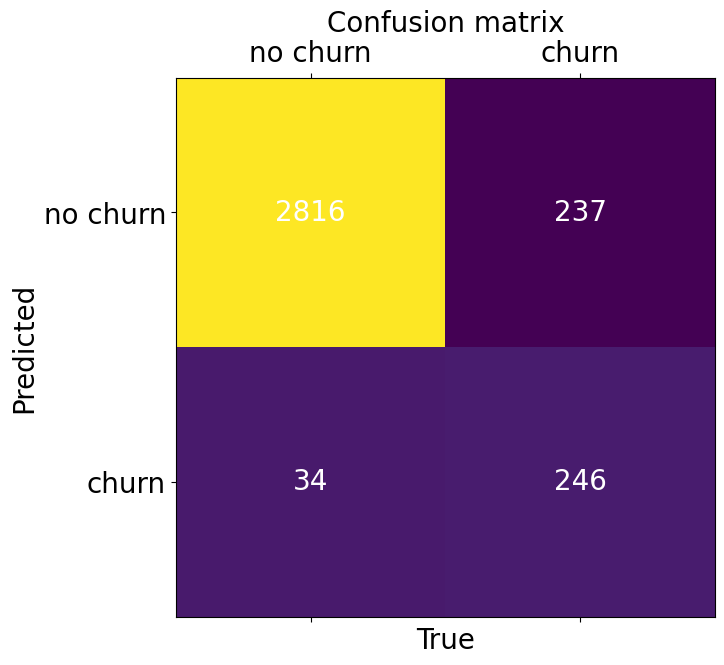

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2850
           1       0.88      0.51      0.64       483

    accuracy                           0.92      3333
   macro avg       0.90      0.75      0.80      3333
weighted avg       0.92      0.92      0.91      3333



In [16]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

Let us cross-validate the parameters and check if we can do better.

In [19]:
#from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
parameters = {'C':[ 2,4,8],'gamma':[0.02, 0.05, 0.1], 'class_weight':[{0:0.5},{0:1},{0:2}]}

kf=model_selection.KFold( n_splits=5, shuffle=False)
kf.get_n_splits(X)
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #Standard parameters
    clf = svm.SVC(kernel='rbf', class_weight={0:1,1:10})
    # We can change the scoring "average_precision", "recall", "f1"
    clf = model_selection.GridSearchCV(clf, parameters, scoring='average_precision')
    clf.fit(X_train,y_train.ravel())
    X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    #recall, f1, precision
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    print (str(clf.best_params_))
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

{'C': 2, 'class_weight': {0: 2}, 'gamma': 0.05}
{'C': 4, 'class_weight': {0: 0.5}, 'gamma': 0.05}
{'C': 2, 'class_weight': {0: 2}, 'gamma': 0.05}
{'C': 2, 'class_weight': {0: 2}, 'gamma': 0.05}
{'C': 2, 'class_weight': {0: 2}, 'gamma': 0.05}
Mean accuracy: 0.9180896038467253


/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_4032/1347475485.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_4032/1347475485.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels, size=20)


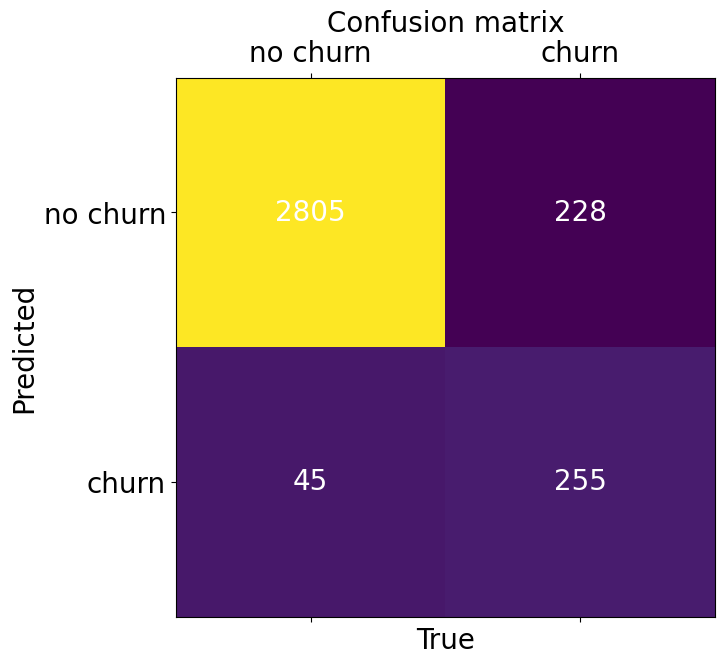

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2850
           1       0.85      0.53      0.65       483

    accuracy                           0.92      3333
   macro avg       0.89      0.76      0.80      3333
weighted avg       0.91      0.92      0.91      3333



In [20]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

**QUESTION:** We are dealing with an unbalanced problem. Lets understand what we could even do to deal with it.
(Imbalanced Dataset slides)
</div>